In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


In [3]:
car_data_transformed = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Dane/car_data_transformed.csv')
recruitment_data_transformed = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Dane/recruitment_data_transformed.csv')
diabetes_data_transformed = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Dane/diabetes_data_transformed.csv')
banknote_authentication_transformed = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Dane/banknote_authentication_transformed.csv')
datasets = [car_data_transformed, recruitment_data_transformed, diabetes_data_transformed, banknote_authentication_transformed]

In [4]:
model_pipeline = Pipeline(steps=[
                         ('model', LogisticRegression())])

## RANDOM SEARCH

In [ ]:
results = pd.DataFrame()

In [ ]:
from scipy.stats import loguniform, uniform, randint

param_grid = {
        'model__solver': ['saga'],
        'model__penalty': ['elasticnet', 'l1', 'l2', None],
        'model__C': loguniform(0.001, 100),
        'model__max_iter': randint(10, 501),
        'model__tol': loguniform(1e-6, 1e-4),
        'model__class_weight': ['balanced', None],
        'model__l1_ratio': uniform(0, 1)
}


In [ ]:
rs = RandomizedSearchCV(model_pipeline,
                        param_grid,
                        cv = 3,
                        n_jobs = -1,
                        n_iter=300,
                        random_state=42
                        )

### Poniżej znajduje sie customowy random search ktory zapisuje wyniki dla każdej kombinacji parametrów


In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

class CustomRandomizedSearchCV(RandomizedSearchCV):
    def __init__(self, estimator, param_distributions, n_iter=10, cv=None,
                 refit=True, n_jobs=None, verbose=0, pre_dispatch='2*n_jobs',
                 random_state=None, error_score='raise', return_train_score=False,
                 dataset_name=None, scoring='roc_auc'):
        # Explicitly calling the parent class constructor with named parameters
        super().__init__(estimator=estimator,
                         param_distributions=param_distributions,
                         n_iter=n_iter,
                         cv=cv,
                         refit=refit,
                         n_jobs=n_jobs,
                         verbose=verbose,
                         pre_dispatch=pre_dispatch,
                         random_state=random_state,
                         error_score=error_score,
                         return_train_score=return_train_score,
                         scoring=scoring)

        self.dataset_name = dataset_name
        self.results_df = pd.DataFrame()

    def fit(self, X, y=None, **fit_params):
        super().fit(X, y, **fit_params)

        # Collect results for each iteration
        results = []
        for idx, params in enumerate(self.cv_results_['params']):
            score = self.cv_results_['mean_test_score'][idx]
            params['Combination_ID'] = idx + 1
            params['Score'] = score
            params['Dataset'] = self.dataset_name
            results.append(params)

        # Create a DataFrame from the results
        self.results_df = pd.DataFrame(results)

        return self


### CARS

In [ ]:
# Przykład użycia niestandardowego RandomizedSearchCV
rs = CustomRandomizedSearchCV(
    model_pipeline,
    param_grid,
    cv=3,
    n_jobs=-1,
    n_iter=300,
    random_state=42,
    dataset_name='car' #UWAGA TU TRZEBA ZMIANIAĆ ŻEBY SIĘ DOBRZE DO RAMKI ZAPISAŁO
)

# Uczenie modelu
rs.fit(datasets[0].drop('Target', axis=1), datasets[0]['Target'])

results_df0 = rs.results_df
# Zapisanie wyników do pliku CSV
results_df0.to_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_rs_car_lr.csv', index=False)  # Zapisujemy do pliku CSV
print("Results have been saved.")

Results have been saved.


### RECRUITMENT

In [ ]:
# Przykład użycia niestandardowego RandomizedSearchCV
rs = CustomRandomizedSearchCV(
    model_pipeline,
    param_grid,
    cv=3,
    n_jobs=-1,
    n_iter=300,
    random_state=42,
    dataset_name='recruit' #UWAGA TU TRZEBA ZMIANIAĆ ŻEBY SIĘ DOBRZE DO RAMKI ZAPISAŁO
)

# Uczenie modelu
rs.fit(datasets[1].drop('Target', axis=1), datasets[1]['Target'])

results_df1 = rs.results_df
# Zapisanie wyników do pliku CSV
results_df1.to_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_rs_hiring_lr.csv', index=False)  # Zapisujemy do pliku CSV
print("Results have been saved.")

Results have been saved.


### DIABETES

In [ ]:
# Przykład użycia niestandardowego RandomizedSearchCV
rs = CustomRandomizedSearchCV(
    model_pipeline,
    param_grid,
    cv=3,
    n_jobs=-1,
    n_iter=300,
    random_state=42,
    dataset_name='diabetes' #UWAGA TU TRZEBA ZMIANIAĆ ŻEBY SIĘ DOBRZE DO RAMKI ZAPISAŁO
)

# Uczenie modelu
rs.fit(datasets[2].drop('Target', axis=1), datasets[2]['Target'])

results_df2 = rs.results_df
# Zapisanie wyników do pliku CSV
results_df2.to_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_rs_diabetes_lr.csv', index=False)  # Zapisujemy do pliku CSV
print("Results have been saved.")

Results have been saved.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


### BANKNOTE

In [ ]:
# Przykład użycia niestandardowego RandomizedSearchCV
rs = CustomRandomizedSearchCV(
    model_pipeline,
    param_grid,
    cv=3,
    n_jobs=-1,
    n_iter=300,
    random_state=42,
    dataset_name='banknote' #UWAGA TU TRZEBA ZMIANIAĆ ŻEBY SIĘ DOBRZE DO RAMKI ZAPISAŁO
)

# Uczenie modelu
rs.fit(datasets[3].drop('Target', axis=1), datasets[3]['Target'])

results_df3 = rs.results_df
# Zapisanie wyników do pliku CSV
results_df3.to_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_rs_banknote_lr.csv', index=False)  # Zapisujemy do pliku CSV
print("Results have been saved.")

Results have been saved.


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### ALL RESULTS

In [ ]:
import pandas as pd
#połączenie w jedna dużą ramke

# Krok 1: Wczytanie ramek danych
df0 = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_rs_car_lr.csv')
df1 = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_rs_hiring_lr.csv')
df2 = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_rs_diabetes_lr.csv')
df3 = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_rs_banknote_lr.csv')

# Krok 2: Skonkatenuj wszystkie ramki w jedną
combined_df = pd.concat([df0, df1, df2, df3], ignore_index=True)

# Krok 3: (Opcjonalnie) Zapisz skonkatonowaną ramkę do pliku CSV
combined_df.to_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/combined_results_lr.csv', index=False)

# Wyświetlenie pierwszych kilku wierszy z połączonej ramki danych
print("Combined DataFrame:")
print(combined_df.head())

Combined DataFrame:
   model__C model__class_weight  model__l1_ratio  model__max_iter  \
0  0.074593            balanced         0.183435               81   
1  0.169498            balanced         0.058084               97   
2  3.470267                 NaN         0.056412              353   
3  0.001009                 NaN         0.183405              469   
4  0.144453            balanced         0.524775              179   

  model__penalty model__solver  model__tol  Combination_ID     Score Dataset  
0     elasticnet          saga    0.000016               1  0.913149     car  
1     elasticnet          saga    0.000016               2  0.912772     car  
2            NaN          saga    0.000075               3  0.911822     car  
3             l1          saga    0.000011               4  0.500000     car  
4            NaN          saga    0.000004               5  0.912184     car  


najlepsze rezultaty dla poszczególnych datasetów:

In [ ]:
combined_df = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/combined_results_lr.csv')

In [ ]:
# Zakładamy, że kolumna ze scores to 'Score', a kolumna z nazwą zbioru to 'Dataset'
best_results = combined_df.loc[combined_df.groupby('Dataset')['Score'].idxmax()]

# Krok 3: Wyświetl najlepsze wyniki
print("Best results for each dataset:")
print(best_results)

Best results for each dataset:
      model__C model__class_weight  model__l1_ratio  model__max_iter  \
920  72.203870            balanced         0.760785              227   
38    0.013567                 NaN         0.096177              498   
659   0.580898                 NaN         0.809361              364   
381   0.023432                 NaN         0.100778              395   

    model__penalty model__solver  model__tol  Combination_ID     Score  \
920             l2          saga    0.000035              21  0.999794   
38      elasticnet          saga    0.000006              39  0.914456   
659             l1          saga    0.000054              60  0.832709   
381     elasticnet          saga    0.000002              82  0.885884   

      Dataset  
920  banknote  
38        car  
659  diabetes  
381   recruit  


wylicznie defaultu: średnia


In [ ]:
# Krok 2: Oblicz średni wynik oraz odchylenie standardowe dla każdej kombinacji parametrów
mean_scores = combined_df.groupby('Combination_ID')['Score'].agg(['mean', 'std']).reset_index()

# Krok 3: Zidentyfikuj Combination_ID z największym średnim wynikiem
best_combination_id = mean_scores.loc[mean_scores['mean'].idxmax()]

# Krok 4: Wyciągnij parametry dla tego Combination_ID
best_combination_details = combined_df[combined_df['Combination_ID'] == best_combination_id['Combination_ID']]

# Krok 5: Wyświetl wynik
print("Combination_ID with the highest average score:")
print(best_combination_id)

print("\nParameters for this Combination_ID:")
print(best_combination_details)

Combination_ID with the highest average score:
Combination_ID    51.000000
mean               0.907487
std                0.069721
Name: 50, dtype: float64

Parameters for this Combination_ID:
     model__C model__class_weight  model__l1_ratio  model__max_iter  \
50   0.271463                 NaN         0.631139              235   
350  0.271463                 NaN         0.631139              235   
650  0.271463                 NaN         0.631139              235   
950  0.271463                 NaN         0.631139              235   

    model__penalty model__solver  model__tol  Combination_ID     Score  \
50      elasticnet          saga     0.00001              51  0.912611   
350     elasticnet          saga     0.00001              51  0.885267   
650     elasticnet          saga     0.00001              51  0.832617   
950     elasticnet          saga     0.00001              51  0.999451   

      Dataset  
50        car  
350   recruit  
650  diabetes  
950  banknote  


Wyliczenie odchylenia standardowego

znalezione defaultowe parametry:

solver = saga

penalty = elasticnet

max_iter = 235

l1_ratio = 0.63

class_weight = None

C = 0.27

tol = 0.00001



### WYKRESY

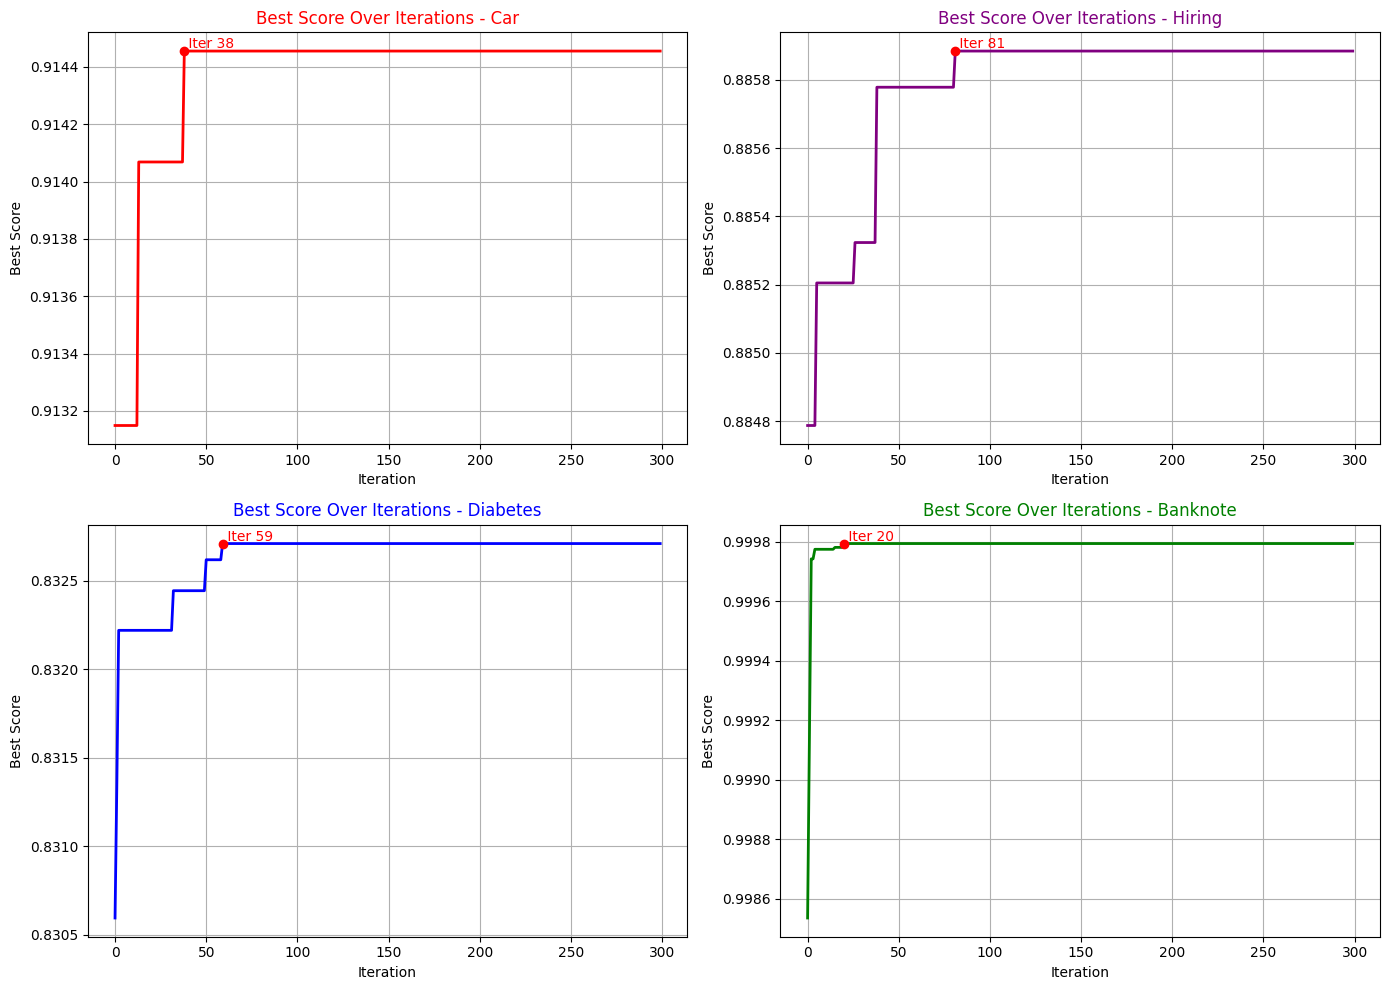

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df0 = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_rs_car_lr.csv')
df1 = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_rs_hiring_lr.csv')
df2 = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_rs_diabetes_lr.csv')
df3 = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_rs_banknote_lr.csv')

# Compute cumulative best scores for each DataFrame
df0['Best_Score_So_Far'] = df0['Score'].cummax()
df1['Best_Score_So_Far'] = df1['Score'].cummax()
df2['Best_Score_So_Far'] = df2['Score'].cummax()
df3['Best_Score_So_Far'] = df3['Score'].cummax()

# Set up a 2x2 grid for subplots without shared y-axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=False)

# Define data, colors, and titles for each plot
dfs = [df0, df1, df2, df3]
colors = ["red", "purple", "blue", "green"]
titles = ['Car', 'Hiring', 'Diabetes', 'Banknote']

# Plot each cumulative best score in its respective subplot
for i, (df, color, title) in enumerate(zip(dfs, colors, titles)):
    row, col = divmod(i, 2)

    # Find the iteration where the best score occurred
    best_iteration = df['Best_Score_So_Far'].idxmax()
    best_score = df['Best_Score_So_Far'].max()

    # Plot the cumulative best score
    axs[row, col].plot(df.index, df['Best_Score_So_Far'], color=color, linewidth=2)
    axs[row, col].set_title(f'Best Score Over Iterations - {title}', color=color)
    axs[row, col].set_xlabel('Iteration')
    axs[row, col].set_ylabel('Best Score')
    axs[row, col].grid(True)

    # Mark and label the iteration with the best score
    axs[row, col].plot(best_iteration, best_score, 'ro')  # Red dot
    axs[row, col].text(best_iteration, best_score, f' Iter {best_iteration}',
                       color='red', ha='left', va='bottom', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# BAYES

In [ ]:
! pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 10.4 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
results_bayes = pd.DataFrame()

In [ ]:
from skopt import BayesSearchCV
import pandas as pd

def performBayes(X, y, dataset_name, bs, param_grid_bayes, n):
    results = pd.DataFrame()
    for i in range(n):
        print('Iteration', i + 1, 'in progress...')
        # Zmiana punktu startowego w każdej iteracji
        bs = BayesSearchCV(
            model_pipeline,
            param_grid_bayes,
            cv=3,
            n_iter=30,
            n_jobs=-1,
            random_state=42 + i,
            scoring='roc_auc'  # Ustawienie metryki AUC zamiast accuracy
        )
        bs.fit(X, y)

        # Zbieranie najlepszych wyników
        res = pd.DataFrame(bs.best_params_, index=[0])
        res['Score'] = bs.best_score_
        results = pd.concat([results, res])

    # Zapis wyników do pliku CSV
    results.to_csv(f'/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_bayes_{dataset_name}.csv')
    print('Done!')
    return results

In [ ]:
param_grid_bayes = {
        'model__solver': ['saga'],
        'model__penalty': ['elasticnet', 'l1', 'l2', None],
        'model__C': Real(0.001, 100, prior='log-uniform'),
        'model__max_iter': Integer(10, 501),
        'model__tol':  Real(1e-6, 1e-4, prior='log-uniform'),
        'model__class_weight': ['balanced', None],
        'model__l1_ratio': Real(0, 1)
}

In [ ]:
bs = BayesSearchCV(model_pipeline,
                   param_grid_bayes,
                   cv = 3,
                   n_iter=30,
                   n_jobs=-1,
                   random_state=42,
                   )

### CARS

In [ ]:
b0 = performBayes(datasets[0].drop('Target', axis=1), datasets[0]['Target'], 0, bs, param_grid_bayes, 50)

Iteration 1 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 2 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 3 in progress...
Iteration 4 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 5 in progress...
Iteration 6 in progress...
Iteration 7 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 8 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 9 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 10 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 11 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 12 in progress...
Iteration 13 in progress...
Iteration 14 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 15 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 16 in progress...
Iteration 17 in progress...
Iteration 18 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 19 in progress...
Iteration 20 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 21 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 22 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 23 in progress...
Iteration 24 in progress...
Iteration 25 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 26 in progress...
Iteration 27 in progress...
Iteration 28 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 29 in progress...
Iteration 30 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 31 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 32 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 33 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 34 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 35 in progress...
Iteration 36 in progress...
Iteration 37 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 38 in progress...
Iteration 39 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 40 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 41 in progress...
Iteration 42 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 43 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 44 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 45 in progress...
Iteration 46 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 47 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 48 in progress...
Iteration 49 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 50 in progress...
Done!


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


### HIRING

In [ ]:
b1 = performBayes(datasets[1].drop('Target', axis=1), datasets[1]['Target'], 1, bs, param_grid_bayes, 50)

Iteration 1 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 2 in progress...
Iteration 3 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 4 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 5 in progress...
Iteration 6 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 7 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 8 in progress...
Iteration 9 in progress...
Iteration 10 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 11 in progress...
Iteration 12 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 13 in progress...
Iteration 14 in progress...
Iteration 15 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 16 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 17 in progress...
Iteration 18 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 19 in progress...
Iteration 20 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 21 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 22 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 23 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 24 in progress...
Iteration 25 in progress...
Iteration 26 in progress...


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, None, 1.0, 10, None, 'saga', 1e-06] before, using random point [0.002047690141624538, 'balanced', 0.6861191085062349, 498, 'l2', 'saga', 6.770533848389819e-06]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 27 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 28 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 29 in progress...
Iteration 30 in progress...
Iteration 31 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 32 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 33 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 34 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 35 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 36 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 37 in progress...
Iteration 38 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 39 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 40 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 41 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 42 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 43 in progress...
Iteration 44 in progress...
Iteration 45 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 46 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 47 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 48 in progress...
Iteration 49 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 50 in progress...
Done!


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


### DIABETES

In [ ]:
b2 = performBayes(datasets[2].drop('Target', axis=1), datasets[2]['Target'], 2, bs, param_grid_bayes, 50)

Iteration 1 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 2 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 3 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 4 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 5 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 6 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 7 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 8 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 9 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 10 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 11 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 12 in progress...
Iteration 13 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 14 in progress...
Iteration 15 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 16 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 17 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 18 in progress...
Iteration 19 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 20 in progress...
Iteration 21 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 22 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 23 in progress...
Iteration 24 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 25 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 26 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 27 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 28 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 29 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 30 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 31 in progress...
Iteration 32 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 33 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 34 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 35 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 36 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 37 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Iteration 38 in progress...
Iteration 39 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 40 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 41 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Iteration 42 in progress...


### BANKNOTE

In [ ]:
b3 = performBayes(datasets[3].drop('Target', axis=1), datasets[3]['Target'], 3, bs, param_grid_bayes, 50)

Iteration 1 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 2 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 3 in progress...


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, None, 0.0, 501, 'elasticnet', 'saga', 1e-06] before, using random point [0.131740302138388, None, 0.5456985308421834, 461, None, 'saga', 4.17639543827774e-05]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 4 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 5 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 6 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 7 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 8 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 9 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 10 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 11 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 12 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 13 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 14 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 15 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 16 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 17 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 18 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 19 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 20 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 21 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 22 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 23 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 24 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 25 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 26 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 27 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 28 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 29 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 30 in progress...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 31 in progress...


### ALL RESULTS

In [ ]:
import pandas as pd
#połączenie w jedna dużą ramke

# Krok 1: Wczytanie ramek danych
df0 = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_bayes_0.csv')
df1 = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_bayes_1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_bayes_2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/results_bayes_3.csv')

# Krok 2: Skonkatenuj wszystkie ramki w jedną
df0.rename(columns={'Unnamed: 0': 'dataset'}, inplace=True)
df0['dataset'] = 0
df1.rename(columns={'Unnamed: 0': 'dataset'}, inplace=True)
df1['dataset'] = 1
df2.rename(columns={'Unnamed: 0': 'dataset'}, inplace=True)
df2['dataset'] = 2
df3.rename(columns={'Unnamed: 0': 'dataset'}, inplace=True)
df3['dataset'] = 3

combined_df = pd.concat([df0, df1, df2, df3], ignore_index=True)

# Krok 3: (Opcjonalnie) Zapisz skonkatonowaną ramkę do pliku CSV
combined_df.to_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/combined_results_lr_bayes.csv', index=False)

# Wyświetlenie pierwszych kilku wierszy z połączonej ramki danych
print("Combined DataFrame:")
print(combined_df.head())

Combined DataFrame:
   dataset  model__C model__class_weight  model__l1_ratio  model__max_iter  \
0        0  0.071119            balanced         0.026113              275   
1        0  0.052686                 NaN         0.000000              178   
2        0  0.009889            balanced         0.001963              295   
3        0  0.007556                 NaN         0.087811               20   
4        0  0.018057            balanced         0.446297              501   

  model__penalty model__solver  model__tol     Score  
0             l1          saga    0.000001  0.914094  
1             l1          saga    0.000001  0.913893  
2     elasticnet          saga    0.000083  0.913575  
3     elasticnet          saga    0.000003  0.914256  
4     elasticnet          saga    0.000001  0.913856  


In [ ]:
combined_df = pd.read_csv('/content/drive/MyDrive/AutoML-Projekt1/Results/LogisticRegression/combined_results_lr_bayes.csv')

In [ ]:
best_results = combined_df.loc[combined_df.groupby('dataset')['Score'].idxmax()]

# Krok 3: Wyświetl najlepsze wyniki
print("Best results for each dataset:")
print(best_results)

Best results for each dataset:
     dataset   model__C model__class_weight  model__l1_ratio  model__max_iter  \
26         0   0.011219            balanced         0.054853               26   
73         1   0.031671                 NaN         0.086645               66   
126        2   0.604408                 NaN         0.851114               49   
151        3  38.873155            balanced         1.000000              501   

    model__penalty model__solver  model__tol     Score  
26      elasticnet          saga    0.000005  0.914542  
73      elasticnet          saga    0.000100  0.885691  
126             l1          saga    0.000031  0.832843  
151             l2          saga    0.000001  0.999794  


### Wykresy

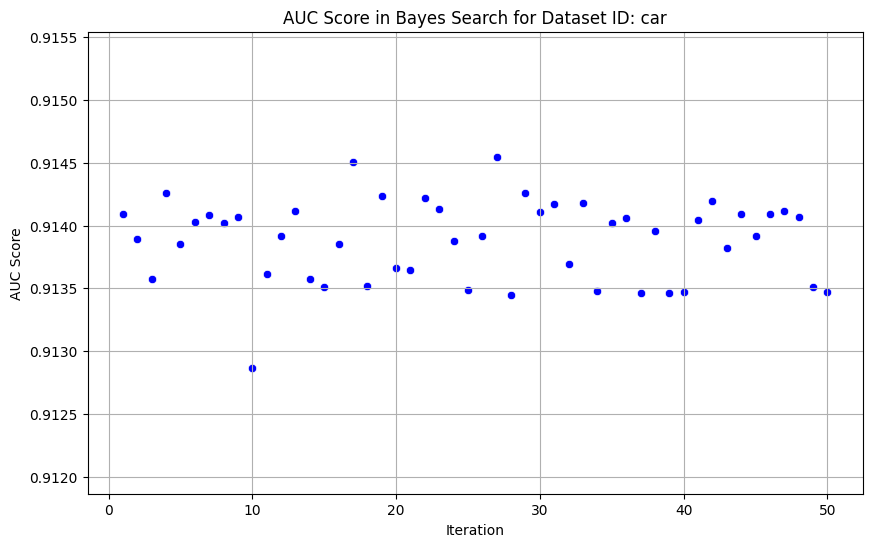

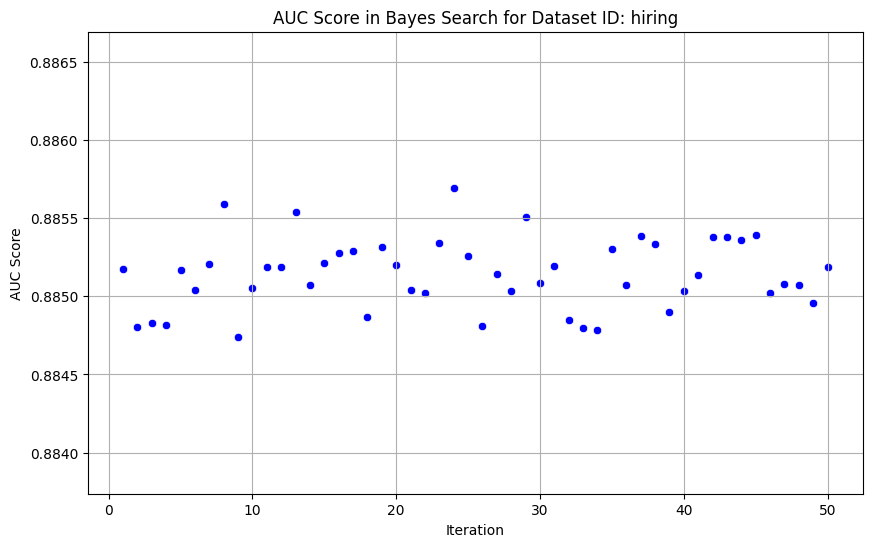

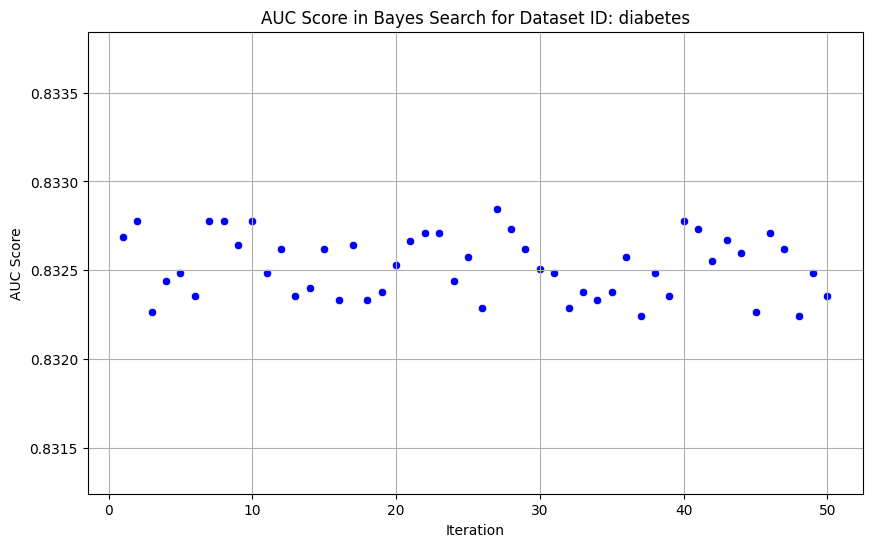

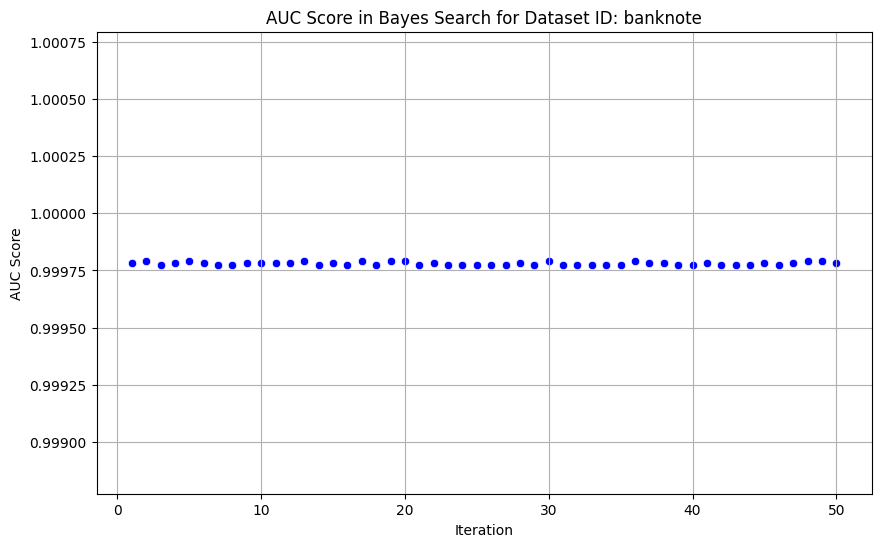

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

datasets_names = ['car', 'hiring', 'diabetes', 'banknote']
# Iteracja przez unikalne wartości datasetu
for dataset_id in combined_df['dataset'].unique():
    # Utwórz nową figurę dla każdego datasetu
    plt.figure(figsize=(10, 6))

    # Filtruj dane dla bieżącego datasetu
    subset = combined_df[combined_df['dataset'] == dataset_id]

    # Wykresy Score w zależności od Iteracji
    sns.scatterplot(x=np.linspace(1, 50, 50), y=subset['Score'], marker='o', color='blue')

    # Ustawienia wykresu
    plt.title(f"AUC Score in Bayes Search for Dataset ID: {datasets_names[dataset_id]}")
    plt.xlabel("Iteration")
    plt.ylabel("AUC Score")

    # Ustawienie zakresu osi Y na podstawie wartości minimum i maksimum
    min_score = subset['Score'].min()
    max_score = subset['Score'].max()
    plt.ylim(min_score - 0.001, max_score + 0.001)  # Ustawienie zakresu osi Y

    plt.grid(True)  # Dodanie siatki dla lepszej wizualizacji
    plt.show()  # Wyświetlenie wykresu


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np

# Tworzymy listę nazw zestawów danych, aby można je było odpowiednio podpisać w wynikach
dataset_names = ["Car Data", "Recruitment Data", "Diabetes Data", "Banknote Authentication"]

# Przechodzimy pętlą po każdym zbiorze danych i wykonujemy walidację krzyżową
for i, data in enumerate(datasets):
    # Tworzymy obiekt Pipeline z modelem RandomForestClassifier
    model_pipeline = Pipeline([('model', LogisticRegression())])

    # Przygotowujemy dane - X to dane wejściowe, y to etykieta (Target)
    X = data.drop(columns=['Target'])
    y = data['Target']

    # W przypadku banknotów przesuwamy etykiety o 1
    if dataset_names[i] == "Banknote Authentication":
        y = y - 1

    # Wykorzystanie walidacji krzyżowej do oceny modelu
    scores = cross_val_score(model_pipeline, X, y, cv=10, scoring = 'roc_auc')

    # Wyświetlamy wyniki dla danego zestawu danych
    print(f"\nWyniki walidacji krzyżowej dla {dataset_names[i]}:")
    print("Dokładności dla każdej iteracji:", scores)
    print("Średnia dokładność:", np.mean(scores))
    print("Odchylenie standardowe dokładności:", np.std(scores))


Wyniki walidacji krzyżowej dla Car Data:
Dokładności dla każdej iteracji: [0.935      0.87458333 0.94       0.88958333 0.97291667 0.945
 0.89791667 0.91125    0.86564696 0.90078545]
Średnia dokładność: 0.9132682410086813
Odchylenie standardowe dokładności: 0.03236130857929665

Wyniki walidacji krzyżowej dla Recruitment Data:
Dokładności dla każdej iteracji: [0.96033877 0.97335261 0.9562074  0.90518488 0.96157819 0.90510033
 0.93938127 0.92976589 0.7826087  0.5583194 ]
Średnia dokładność: 0.8871837432010163
Odchylenie standardowe dokładności: 0.12138619949727583

Wyniki walidacji krzyżowej dla Diabetes Data:
Dokładności dla każdej iteracji: [0.7962963  0.82888889 0.84592593 0.76148148 0.81037037 0.84962963
 0.81259259 0.90666667 0.83307692 0.86461538]
Średnia dokładność: 0.830954415954416
Odchylenie standardowe dokładności: 0.03773012092027923

Wyniki walidacji krzyżowej dla Banknote Authentication:
Dokładności dla każdej iteracji: [1.         1.         0.99870578 0.9997843  0.9989214